In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading data

In [220]:
def load_data(filename):
    return pd.read_csv(filename)

In [221]:
train_data = load_data('train.csv')
test_data = load_data('test.csv')

In [222]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [224]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

Data Exploring

In [225]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [226]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [227]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [228]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [229]:
train_data['Age'].loc[train_data['Sex']=='female'].median()

27.0

In [230]:
train_data['Age'].loc[train_data['Sex']=='male'].median()

29.0

In [231]:
train_data.groupby(['Sex','SibSp'])['Age'].median()

Sex     SibSp
female  0        27.0
        1        31.0
        2        18.0
        3        16.0
        4         7.5
        5        16.0
        8         NaN
male    0        30.0
        1        29.0
        2        26.0
        3         7.0
        4         5.5
        5        10.0
        8         NaN
Name: Age, dtype: float64

In [232]:
train_data.loc[train_data['SibSp']==8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith 'Dolly'",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [233]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [234]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [235]:
train_data.groupby('Parch')['Age'].median()

Parch
0    30.0
1    23.0
2    16.5
3    24.0
4    42.5
5    39.0
6    43.0
Name: Age, dtype: float64

In [236]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Preprocessing

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [238]:
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [239]:
from sklearn.preprocessing import OneHotEncoder

In [240]:
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
('cat_encoder', OneHotEncoder(sparse_output=False))
])

In [241]:
cat_attribs = ['Pclass','Sex','Embarked']
num_attribs = ['Age','SibSp','Parch','Fare']

preprocess_pipeline = ColumnTransformer([
    ('cat',cat_pipeline, cat_attribs),
    ('num',num_pipeline, num_attribs)])

In [242]:
X_train = preprocess_pipeline.fit_transform(train_data[cat_attribs+num_attribs])
y_train = train_data['Survived']

In [243]:
X_train

array([[ 0.        ,  0.        ,  1.        , ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.        ,  0.        ,  0.        , ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 0.        ,  0.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 0.        ,  0.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [244]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

#### Modeling

Random Forest Classifier

In [245]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [246]:
X_test = preprocess_pipeline.transform(test_data[cat_attribs+num_attribs])
y_pred = forest_clf.predict(X_test)

In [247]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8115230961298376

Let's try an SVC

In [248]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

Comparing models' performance

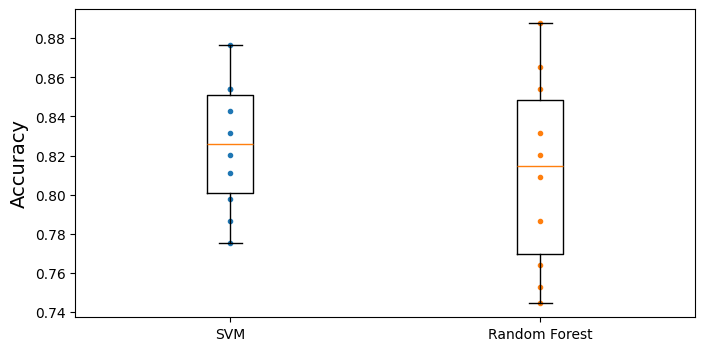

In [249]:
plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], tick_labels=('SVM','Random Forest'))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

SVM is better than Random Forest Classifier